# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [6]:
import pandas as pd
from pandas import read_excel

%pip install xlrd


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Read in the file using pandas, and look at the first five rows

In [9]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time use the `skiprows=` parameter to skip the rows you don't want.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [15]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [16]:
df.head(-5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
...,...,...,...,...,...,...
1205,2006,98.0,408.0,5.0,0.0,NEWS-PAPER(ARASHIYAMA)
1206,2007,97.0,407.0,5.0,0.0,NEWS-PAPER(ARASHIYAMA)
1207,2008,95.0,404.0,6.0,0.0,NEWS-PAPER(ARASHIYAMA)
1208,2009,95.0,405.0,6.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [17]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values="-")
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What source is the most common as a reference?

In [48]:
df['Reference Name'].value_counts().head(1)

## The most common source is 'NEWS-PAPER(ARASHIYAMA)', with 94 instances

Reference Name
NEWS-PAPER(ARASHIYAMA)    94
Name: count, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

Remember, NaN is not a string, you need a special approach to filtering missing data.

In [23]:
df[df['Full-flowering date (DOY)'].notna()]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

<Axes: >

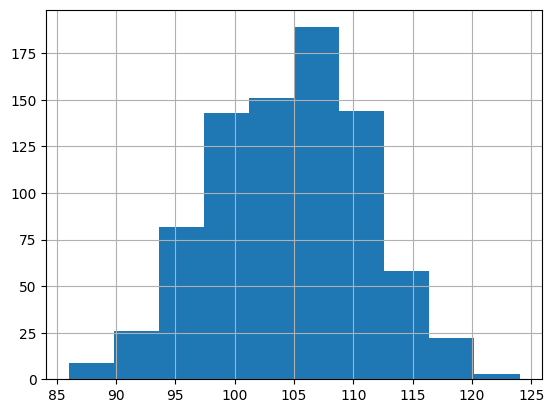

In [25]:
df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<Axes: >

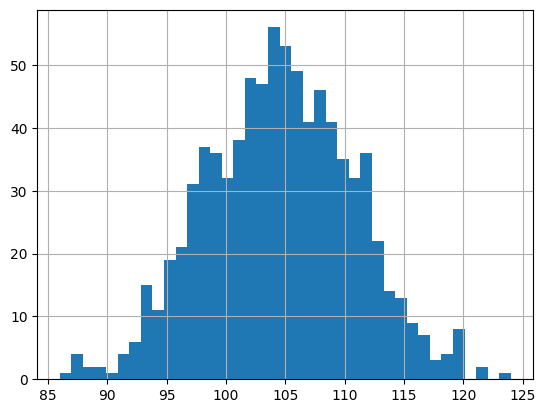

In [34]:
df['Full-flowering date (DOY)'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [ ]:
df['Full-flowering date (DOY)'].agg(['mean', 'count'])


mean     104.540508
count    827.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [46]:
(
    df[df['AD'] < 1900]
    ['Full-flowering date (DOY)'].mean()
)

## Before 1900 the mean was 105.2073

np.float64(105.20728291316527)

## 11. How about after 1900?

In [45]:
(
    df[df['AD'] > 1900]
    ['Full-flowering date (DOY)'].mean()
)

## After 1900 the mean was 100.3125

np.float64(100.3125)

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [44]:
df[df['Data type code'] == 4].shape

## There were 39 times the data in the sheet was from a title in Japanese poetry

(39, 6)

## 13. Show only the years where our data was from a title in Japanese poetry

In [49]:
df[df['Data type code'] == 4]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<Axes: >

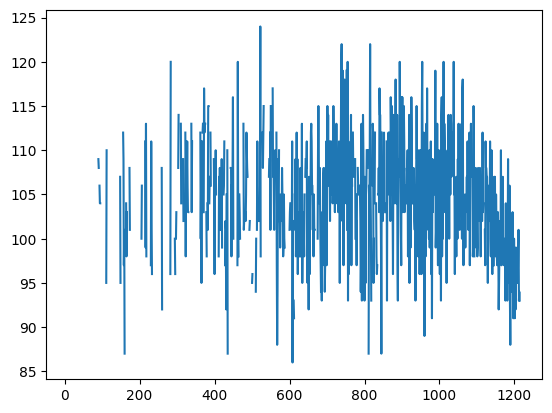

In [59]:
(
    df['Full-flowering date (DOY)']
    .plot(kind='line',
          x='AD',
          y='Full-flowering date (DOY)')
)

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [61]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

Use the code above (or ChatGPT) to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [82]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

<Axes: >

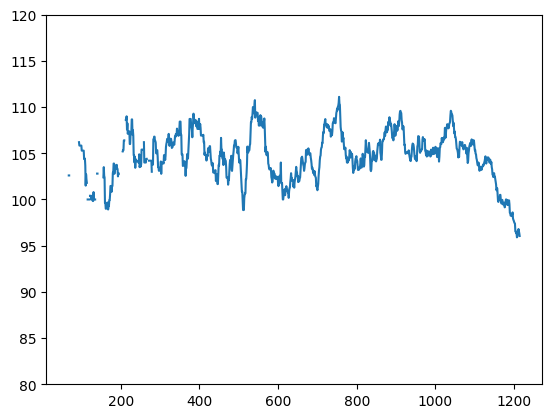

In [84]:
(
    df['rolling_date']
    .plot(kind='line',
          x='AD',
          y='Full-flowering date (DOY)',
          ylim=(80,120))
)

### 16. Add a true column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

To convert a string that *looks* like a date into something that *is* a date you use `pd.to_datetime(df['colname'])`. Usually you're converting nice dates like `2025-01-01`, but in this case it's much worse.

If pandas doesn't figure it out automatically with `pd.to_datetime`, you need to pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df['colname'], "format='%Y-%m-%d")`. **How would you describe the format of the current date data?**

* Adding `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"

In [101]:
df['Full-flowering date (as date)'] = pd.to_datetime(df['Full-flowering date'], format="%-m%d", errors='coerce')

In [103]:
df.head(15)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,Full-flowering date (as date)
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,806,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,807,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7,808,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,809,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9,810,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### 17. Using your new column, how many blossomings happened in each month?

You can extract the month from the datetime column using `df['colname'].dt.month`.

In [107]:
(
    df['Full-flowering date (as date)']
    .dt.month
    .value_counts()
)

Full-flowering date (as date)
4.0    814
3.0     10
5.0      3
Name: count, dtype: int64

### 18. Graph how many blossomings happened in each month.

Hopefully you're just adding `.plot()` onto the last answer.

<Axes: xlabel='Full-flowering date (as date)'>

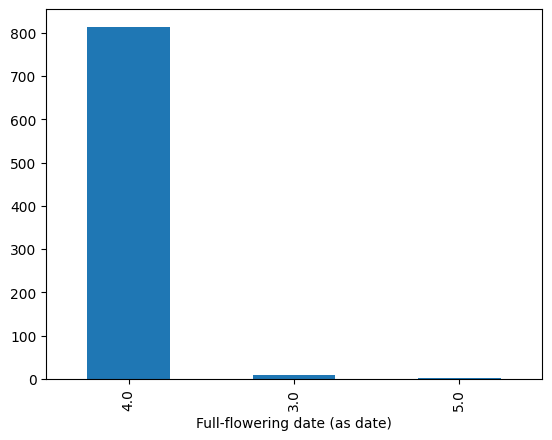

In [114]:
(
    df['Full-flowering date (as date)']
    .dt.month
    .value_counts()
    .plot(kind='bar')
)

# YOU ARE DONE.

And **incredible.**